In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tqdm import tqdm
from tqdm._tqdm import trange

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.std.*` instead of `tqdm._tqdm.*`
  


###4.1

**How many optimization variables are we going to train using this model?**

For each dense layer with input dimension N1 and output dimension N2, the number of parameters is $N1\times N2+N2,$ which means there are $N1\times N2$  weights and $N2 $ biases. 

For predict layer, there are like dense layer but only have weights and no biases. 

For Input Layer, there is no parameter to optimize.

Hence, for the network above, there are total $784*32+32+32*32+32+32*10+10 = 26506$ parameters.

In [ ]:
# source: https://keras.io/guides/training_with_built_in_methods/

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x = layers.Dense(32, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


###5.1
Reusing the code provided in the basic functions file, implement stochastic gradient descent
for the resolution of the neural network model.

In [ ]:
def random_batch(X_train, y_train, batch_size):
    rnd_indices = np.random.randint(0, len(X_train), batch_size)
    X_batch = X_train[rnd_indices]
    y_batch = y_train[rnd_indices]
    return X_batch, y_batch

In [ ]:
def update_weights(model, update,lr):
    new_weights = model.trainable_weights.copy()
    for i in range(len(new_weights)):
        new_weights[i] = new_weights[i] - lr*update[i]
    model.set_weights(new_weights)

def std(x_train, y_train, loss, model, lr0, batch_size,random_batch = False, epoch = 10, lr_decrease=0.9):
  loss_epoch = []
  lr_list = [lr0]
  lr = lr0
  iter = range(0,int(len(x_train)/batch_size),100)
  for j in tqdm(range(epoch)):
    loss_list = []
    for i in range(int(len(x_train)/batch_size)):
      if random_batch == False:
        x_train_batch = x_train[i*batch_size: (i+1)*batch_size]
        y_train_batch = y_train[i*batch_size: (i+1)*batch_size]
    # Example of gradient computation using automatic differentiation
      else:
        x_train_batch,  y_train_batch = random_batch(x_train, y_train, batch_size)
      #i = random.randint(0,batch_size)
      with tf.GradientTape() as tape:
        # Run the forward pass of the layer.
        # The operations that the layer applies
        # to its inputs are going to be recorded
        # on the GradientTape.
        #print(x_train_batch.shape)
        if batch_size ==1:
          logits = model(x_train_batch.reshape(1,-1), training=True)
        else:
          logits = model(x_train_batch, training=True)  # Logits for this minibatch
        # Compute the loss value for this minibatch.
        loss_value = loss(y_train_batch, logits)
        #print("loss_value",loss_value)
        if (i% (int(500/batch_size)))==0:
          loss_list.append(loss_value)
          lr = lr_list[-1]*lr_decrease
        
      # Use the gradient tape to automatically retrieve
      # the gradients of the trainable variables with respect to the loss.
      grad = tape.gradient(loss_value, model.trainable_weights)
      update_weights(model, grad, lr)
    lr_list.append(lr)
    loss_epoch.append(loss_list[-1])
    print("The {}th epoch with lr={}".format(j,lr))
    plt.plot(range(len(loss_list)),loss_list)
    plt.title("Loss of the "+str(j)+"th epoch")
    plt.show()

  plt.plot(range(epoch),loss_epoch)
  plt.show()

###5.2
Run it for one pass over the data (also called one epoch) and with a learning rate that satisfies the conditions required by theory.

Plot the objective value as a function of the iterations.

11501568/11490434 [==============================] - 0s 0us/step
5


array([0])

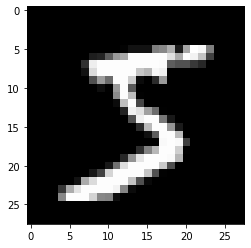

In [ ]:
train_data, test_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
x_train = train_data[0].reshape(-1,784).astype(float) / 255
y_train = train_data[1]
print(y_train[0])
plt.imshow(train_data[0][0], cmap='gray')

# untrained model
logits = model(x_train[0].reshape(1,-1), training=True)
np.argmax(logits, 1)[0:100]


Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


The 0th epoch with lr=0.0004


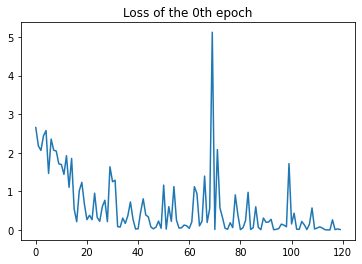

100%|██████████| 1/1 [05:56<00:00, 356.06s/it]


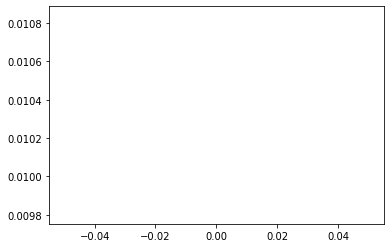

In [ ]:
# source: https://keras.io/guides/training_with_built_in_methods/

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x = layers.Dense(32, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.summary()

std(x_train, y_train, loss, model,0.0005,batch_size =1,epoch=1,lr_decrease=0.8)

In [ ]:
## Evaluate model
samples_for_evaluation = np.random.randint(0, 10000, 1000)
logits = model(x_train[samples_for_evaluation])
print("loss of training set",loss(y_train[samples_for_evaluation], logits).numpy())


x_test = test_data[0].reshape(-1,784).astype(float) / 255
y_test = test_data[1]
logits = model(x_test)
print("Loss of test_set",loss(y_test, logits).numpy())


loss of training set 0.33365434
Loss of test_set 0.33674294


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


##6.1
Implement stochastic gradient descent for the resolution of the empirical risk minimization problem and run it for 10 epochs.



Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


The 0th epoch with lr=0.00035


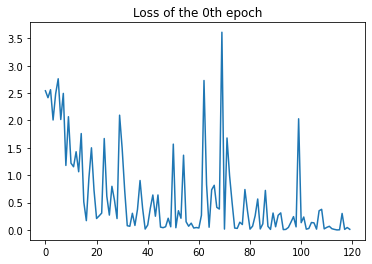

 10%|█         | 1/10 [04:50<43:34, 290.54s/it]

The 1th epoch with lr=0.000245


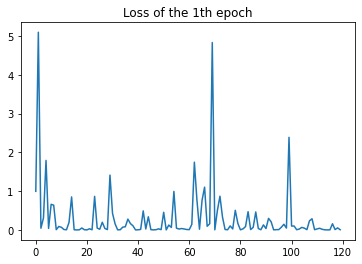

 20%|██        | 2/10 [09:39<38:36, 289.60s/it]

The 2th epoch with lr=0.0001715


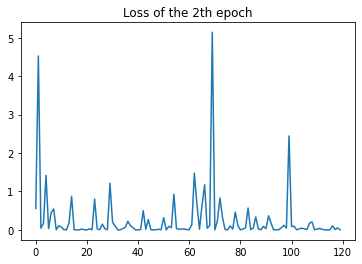

 30%|███       | 3/10 [14:24<33:31, 287.32s/it]

The 3th epoch with lr=0.00012004999999999999


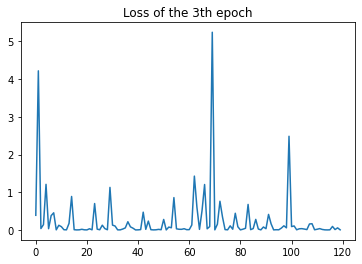

 40%|████      | 4/10 [19:13<28:48, 288.10s/it]

The 4th epoch with lr=8.403499999999999e-05


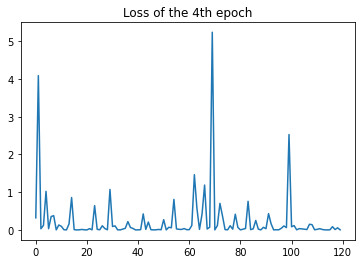

 50%|█████     | 5/10 [23:59<23:57, 287.52s/it]

The 5th epoch with lr=5.882449999999999e-05


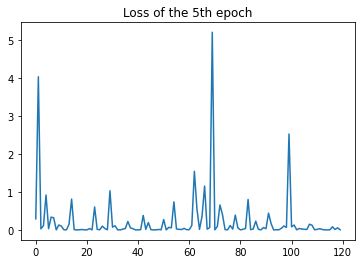

 60%|██████    | 6/10 [28:46<19:09, 287.30s/it]

The 6th epoch with lr=4.117714999999999e-05


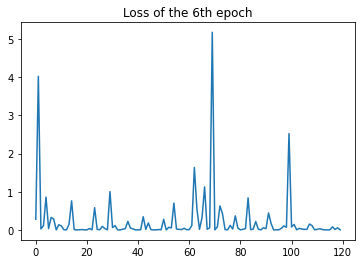

 70%|███████   | 7/10 [33:32<14:20, 286.83s/it]

The 7th epoch with lr=2.8824004999999994e-05


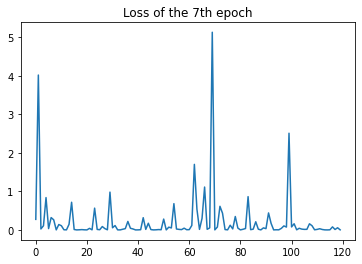

 80%|████████  | 8/10 [38:17<09:32, 286.37s/it]

The 8th epoch with lr=2.0176803499999996e-05


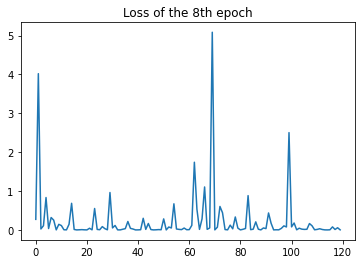

 90%|█████████ | 9/10 [43:01<04:45, 285.60s/it]

The 9th epoch with lr=1.4123762449999997e-05


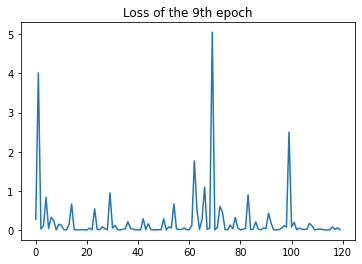

100%|██████████| 10/10 [47:47<00:00, 286.72s/it]


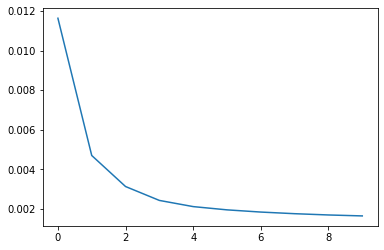

loss of training set 0.21729547
Loss of test_set 0.23045361


In [ ]:
#Initialization of the model

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x = layers.Dense(32, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.summary()

std(x_train, y_train, loss, model, 0.0005,1, epoch = 10,lr_decrease = 0.8)

## Evaluate model
samples_for_evaluation = np.random.randint(0, 10000, 1000)
logits = model(x_train[samples_for_evaluation])
print("loss of training set",loss(y_train[samples_for_evaluation], logits).numpy())

x_test = test_data[0].reshape(-1,784).astype(float) / 255
y_test = test_data[1]
logits = model(x_test)
print("Loss of test_set",loss(y_test, logits).numpy())

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


The 0th epoch with lr=0.00045000000000000004


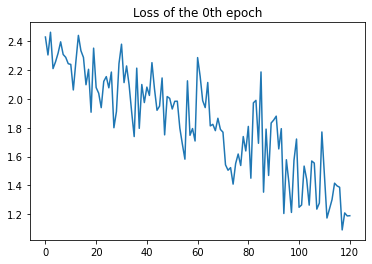

 10%|█         | 1/10 [00:39<05:58, 39.79s/it]

The 1th epoch with lr=0.00040500000000000003


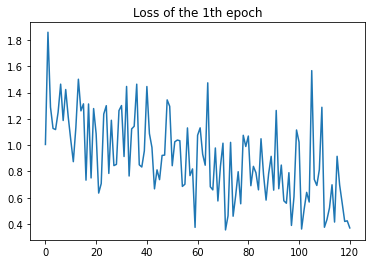

 20%|██        | 2/10 [01:17<05:06, 38.34s/it]

The 2th epoch with lr=0.0003645


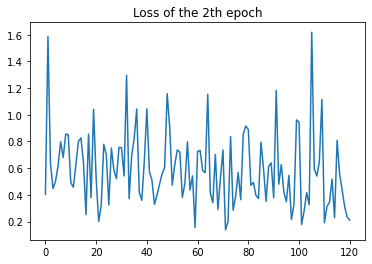

 30%|███       | 3/10 [01:55<04:30, 38.58s/it]

The 3th epoch with lr=0.00032805000000000003


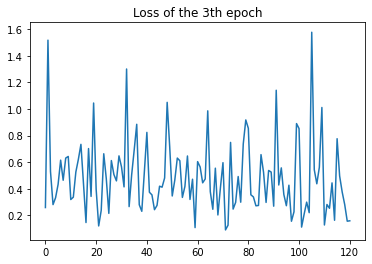

 40%|████      | 4/10 [02:33<03:49, 38.24s/it]

The 4th epoch with lr=0.000295245


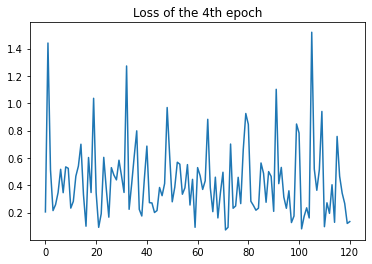

 50%|█████     | 5/10 [03:11<03:09, 37.95s/it]

The 5th epoch with lr=0.0002657205


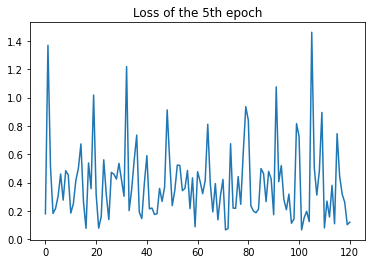

 60%|██████    | 6/10 [03:48<02:31, 37.86s/it]

The 6th epoch with lr=0.00023914845


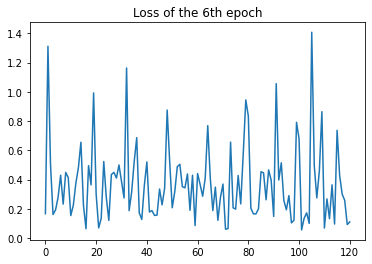

 70%|███████   | 7/10 [04:26<01:53, 37.80s/it]

The 7th epoch with lr=0.000215233605


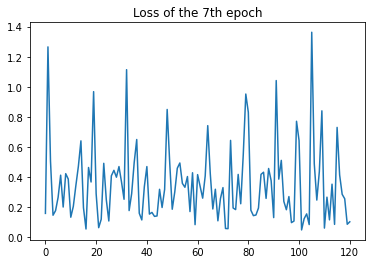

 80%|████████  | 8/10 [05:04<01:15, 37.84s/it]

The 8th epoch with lr=0.0001937102445


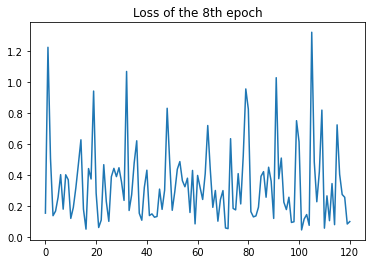

 90%|█████████ | 9/10 [05:42<00:37, 37.85s/it]

The 9th epoch with lr=0.00017433922005


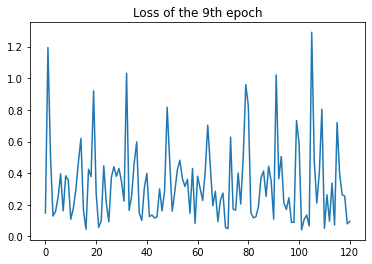

100%|██████████| 10/10 [06:20<00:00, 38.01s/it]


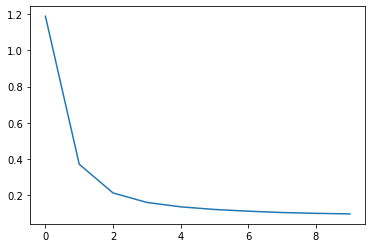

In [ ]:
#Initialization of the model

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x = layers.Dense(32, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.summary()

std(x_train, y_train, loss, model, 0.0005,8, epoch = 10,lr_decrease = 0.9)

In [ ]:
## Evaluate model
samples_for_evaluation = np.random.randint(0, 10000, 1000)
logits = model(x_train[samples_for_evaluation])
print("loss of training set",loss(y_train[samples_for_evaluation], logits).numpy())

x_test = test_data[0].reshape(-1,784).astype(float) / 255
y_test = test_data[1]
logits = model(x_test)
print("Loss of test_set",loss(y_test, logits).numpy())


loss of training set 0.33485493
Loss of test_set 0.32649636


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


###6.2
According to you, what is the advantage of such a scheme?

The computation is faster and quicker because the update can be performed by traversing only some of the samples.

###7
Evaluate the accuracy of the model on the training set and on the test set.

**batch_size = 1, epoch = 1**

loss of training set 0.33365434
Loss of test_set 0.33674294

**batch_size = 1, epoch = 10**

loss of training set 0.21729547
Loss of test_set 0.23045361

**batch_size = 8, epoch = 10**

loss of training set 0.33485493
Loss of test_set 0.32649636